<a href="https://colab.research.google.com/github/shirish-baral/ai-lab/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 4: Uniform Cost Search for Optimal Path

Objective: Implement Uniform Cost Search for a weighted graph.

Problem Statement: Given a weighted graph (e.g., a transportation network with travel costs), find the minimum-cost path between two nodes.

Tasks:
Represent the graph as an adjacency list.
Implement Uniform Cost Search to find the optimal path.
Compare it with BFS for unweighted graphs.

Uniform Cost Search: Cost = 5 , Path = ['A', 'C', 'F']


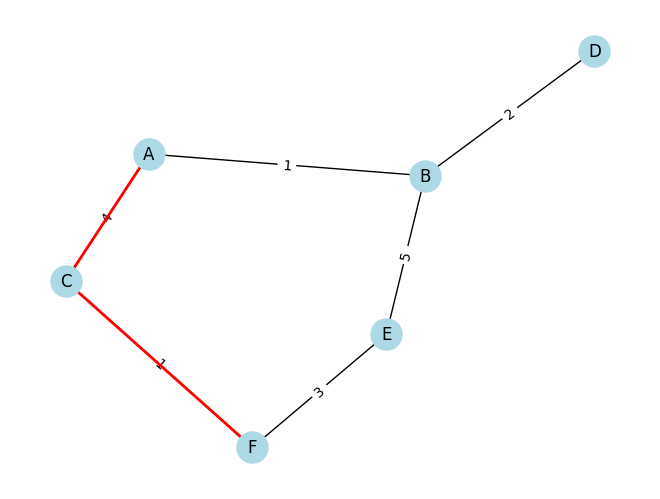

In [2]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    # Priority queue for UCS (cost, node, path)
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        # Pop the node with the lowest cost
        cost, node, path = heapq.heappop(priority_queue)

        # Skip already visited nodes
        if node in visited:
            continue

        # Mark the node as visited
        visited.add(node)
        path = path + [node]

        # If goal is reached, return the cost and path
        if node == goal:
            return cost, path

        # Explore neighbors
        for neighbor, weight in graph[node]:
            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + weight, neighbor, path))

    return None  # Return None if no path is found

def visualize_weighted_graph(graph, path=None):
    G = nx.Graph()
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    if path:
        edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2)

    plt.show()

# Define the graph
graph = {
    "A": [("B", 1), ("C", 4)],
    "B": [("A", 1), ("D", 2), ("E", 5)],
    "C": [("A", 4), ("F", 1)],
    "D": [("B", 2)],
    "E": [("B", 5), ("F", 3)],
    "F": [("C", 1), ("E", 3)]
}

# Find optimal path with UCS
start_node = "A"
goal_node = "F"

cost, path = uniform_cost_search(graph, start_node, goal_node)
print("Uniform Cost Search: Cost =", cost, ", Path =", path)

# Visualize graph with UCS path
visualize_weighted_graph(graph, path)
